### <strong>第二次作品：數學與簡單的統計量計算</strong>
學號：410979068

姓名：施尚丞

<hr>

 <font color= skyblue, fontweight='bold'>作品目標</font>： <br> 
1.藉由不同的方式，計算幾個基本的敘述統計量（descriptive statistics），學習 Python 的基本數學計算技巧。 <br> 
2.學習輸入外部的純文字資料檔（.txt 與 xlsx 檔）。 <br> 
3.從網站下載 CSV 資料檔，供程式計算之用。 <br> 
4.利用 Pandas 與 Scipy 套件處裡資料。 <br> 
5.繪製基本散佈圖及其變化形式。 <br> 
6.在散佈圖中加入多項式迴歸線。 <br> 
7.Python 的 Broadcasting 技術。 <br> 



<hr>
練習:

Given $x = [6\;\; 3 \;\; 5 \;\; 8 \;\; 7] $ and $  y = [2\;\; 4 \;\; 3 \;\; 7 \;\; 6] $ compute the correlation coefficient $$ r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} $$ where  
$$  \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \;\; \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i $$ 

$$ \bar{\sigma}_x = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})^2}, \;\; \bar{\sigma}_y = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (y_i-\bar{y})^2}$$


**<font color=skyblue>注意事項與討論：</font>**\
這個階段學習程式語言，不急著直接 copy/paste 現成的程式碼，而是先想想、試試該怎麼做？做不對了、想不出來了，再來一行行地看參考程式。也許看到某一行便能自己完成。

學習用不同的方式計算同一個統計量。藉此熟悉 Python 的各種語法與計算指令，譬如 np.sum(x)（object method） 與 x.sum()（module method）用法不同，意思一樣。

熟悉兩種將靜態文字與動態變數結合成一個字串的方式（以便利輸出觀看結果，或輸出到圖形的 title、legend …）

In [1]:

import numpy as np
 
x = np.array([6, 3, 5, 8, 7])
y = np.array([2, 4, 3, 7, 6])
 
sum_x_formula = x[0] + x[1] + x[2] + x[3] + x[4]
sum_x = x.sum() # numpy data's method
 
n = len(x) # sample size
x_bar_formula = sum_x / n 
x_bar = x.mean()
 
var_x_formula_1 = ((x - x_bar)**2).sum() / (n-1) # element by element operation
var_x_formula_2 = np.sum((x - x_bar)**2) / (n-1)
var_x = x.var( ddof = 1) # ddof = 1: divided by N-1
 
std_x_formula = np.sqrt(var_x)
std_x = x.std( ddof = 1)
 
y_bar = y.mean()
std_y = y.std( ddof = 1)
 
print('The sample mean of x is {:.4f}'.format(x_bar))
print('The sample variation of x is {}'.format(var_x))
print('The sample standard deviation of x is %.6f' %std_x)


The sample mean of x is 5.8000
The sample variation of x is 3.7
The sample standard deviation of x is 1.923538


**<font color=skyblue>注意事項與討論：</font>**
- 引入NumPy和Matplotlib庫，用於數值計算和繪圖。
- 以足夠多的項次，代替無限次項的加法。
- 調整Y軸的範圍以達到較佳的觀賞角度，X軸則固定。
- x 數組將包含1000個數值，在從 -3π 到 3π 的範圍內均勻分佈，這些數值可以用作繪製函數的 x 座標或用於進行各種數學計算的數據。
- 牽涉三角函數，因此 X 軸範圍以 $\pi$ 的倍數訂定。
- 將x軸的0置中，方便觀察函數其x值最接近0時之y值。

<hr>
練習： <br>

Compute the zscore for the sample $ x = [6\;\; 3 \;\; 5 \;\; 8 \;\; 7] $ where
 $$ [z_i = \frac{x_i - \bar{x}}{\bar{\sigma}_x}] $$ 
for $ i=1,2,\cdots, 5 $

**<font color=skyblue>注意事項與討論：</font>**
1. 要熟悉 Python 的數學計算語法，最好的方式是根據數學公式計算，再以現成的指令比對結果，譬如計算本範例的 Z score。現成的指令在 scipy.stats.zscore 。

2. 下列程式碼刻意留一部分給讀者填補，否則學習程式容易變成觀賞別人的程式。就算看懂了，還是不會寫。

3. 程式碼最後一行將依據公式計算的結果與現成指令比較。將兩筆向量合併列印。

4. 讀者可以試著計算 skewness 與 kurtosis，分別從統計量的公式與 scipy 的指令。



In [3]:
import numpy as np
from scipy.stats import zscore

x = np.array([6, 3, 5, 8, 7])
z = zscore(x, ddof=1)

# Calculate mean and sample standard deviation using numpy
x_mean = np.mean(x)
x_std = np.std(x, ddof=1)

# Calculate z-scores using the formula
z_formula = (x - x_mean) / x_std

# To compare two vectors
print(np.c_[z, z_formula])
 # concatenate vertically

[[ 0.10397505  0.10397505]
 [-1.45565069 -1.45565069]
 [-0.4159002  -0.4159002 ]
 [ 1.14372554  1.14372554]
 [ 0.62385029  0.62385029]]


<hr>
練習： <br>

 Given $ x = [6\;\; 3 \;\; 5 \;\; 8 \;\; 7] $ and $ y = [2\;\; 4 \;\; 3 \;\; 7 \;\; 6] $ , compute the correlation coefficient
$ r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} $ where 

$$ S_{xy} = \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

$$ S_{xx} = \sum_{i=1}^n (x_i-\bar{x})^2, \;\; S_{yy} = \sum_{i=1}^n (y_i-\bar{y})^2 $$

In [8]:
import numpy as np
from scipy.stats import pearsonr
 
x = np.array([6, 3, 5, 8, 7])
y = np.array([2, 4, 3, 7, 6])
 
# coding for r by formula
n = len(x)
cov_xy = np.sum((x - x.mean()) * (y - y.mean())) / (n - 1)
std_x = x.std(ddof=1)
std_y = y.std(ddof=1)

r_formula = cov_xy / (std_x * std_y)
print('Correlation coefficient by formula is {:.4f}'.format(r_formula))
# directly use command from scipy.stats
r_sci = pearsonr(x, y)[0] # the first return value
print('Correlation coefficient by scipy.stats.pearsonr is %.4f' %r_sci)

Correlation coefficient by formula is 0.5892
Correlation coefficient by scipy.stats.pearsonr is 0.5892


<hr>
範例2: <br>
使用前面範例的 x, y 樣本，繪製 X-Y 散佈圖。

**<font color=skyblue>注意事項與討論：</font>**
1. Python 有幾個繪圖的套件都支援散佈圖，本範例採 matplotlib 套件的 scatter 指令.

2. matplotlib 套件的 scatter 指令內容（attributes）非常豐富，請自行查手冊，玩玩其他功能，譬如每個點的形狀（marker），或點的大小（s=）、點的顏色（c=）。

3. 畫散佈圖通常需要調整 X-Y 軸的範圍，讓散佈圖看得出散佈的趨勢。

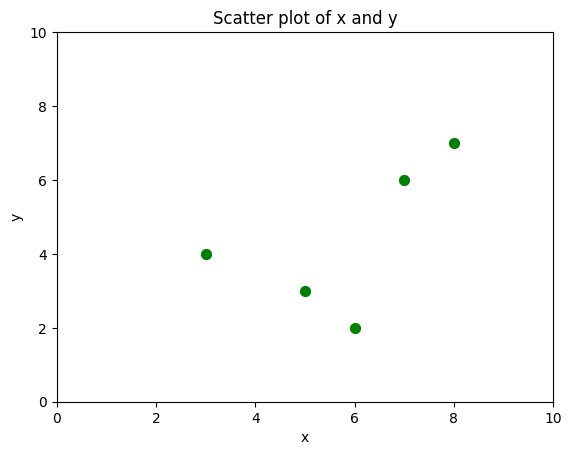

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
 
x = np.array([6, 3, 5, 8, 7])
y = np.array([2, 4, 3, 7, 6])
 
size, color = 50, 'g'
plt.scatter(x, y, s = size, c = color)
 
# arrange axis range for better look
plt.axis([0, 10, 0,10])
plt.xlabel('x'), plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()

<hr>

範例3 : 在程式中載入外部 TXT 資料檔案，並繪製資料的散佈圖及計算相關係數 $r$。

**<font color=skyblue>注意事項與討論：</font>**
1. 請先下載示範的資料檔 demo_data.zip 。

2. 一般而言，資料檔與程式檔放置在不同的目錄，在此假設資料檔與程式檔處在兩個平行的目錄，示範程式以相對路徑取得資料檔。

3. 使用 Numpy 套件的 loadtxt 指令讀取 txt 檔，譬如，data1.txt. 請注意，指令 loadtxt 的參數（attribute） comments=’%’ 用來避免讀取檔案中被 % 註解的文字。讀者可以先打開 data1.txt 檔，看看裡面的內容。

4. 在 Mac 電腦上常見 loadtxt 開啟時產生編碼問題（codec），此時可以加入一個 encoding 參數，指令改為 D = np.loadtxt(data_dir + ‘data1.txt’, comments=’%’, encoding=’iso-8859-1′)

5. 程式示範了文字的串接，指引 loadtxt 指令正確的檔案位置。

6. loadtxt 指令的另一個重要的參數是 delimiter。用來區別資料檔內的行與行間的區隔，譬如，有些是逗號（’），或 TAB 間隔，或空白等。要能正確讀取 TXT 檔內的資料，最好先開啟檔案來看看。

7. 下列的散佈圖的點顏色透過 alpha = 0.5 調整其透明度，適合資料量比較大的情況。不透明顏色顯得太沉重。

本範例計算相關係數時，直接採用 pearsonr 指令，而非自己寫計算式。因為我們已經在前面的示範程式證實，這個指令的結果便是我們要的相關係數。請注意，像 Python 這類的自由軟體所提供的指令，有些會與我們認知的有些許差距，必須透過手冊的確認或親自撰寫程式驗證，否則不能貿然取用。

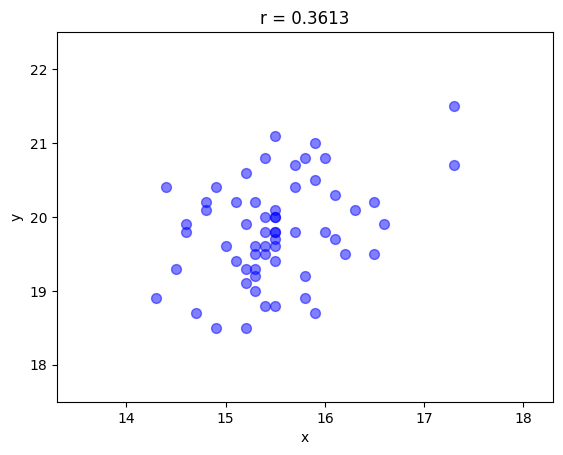

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os

data_dir = r'C:\Users\SHI\OneDrive\PythonCodes\StatComp\demo_data\data1.txt'
D = np.loadtxt(data_dir , comments='%')
x, y = D[:, 0], D[:, 1] 
r = pearsonr(x, y)[0] 
 
plt.scatter(x, y, s = 50, c = 'b', alpha = 0.5)
 
plt.axis([x.min()-1, x.max()+1, y.min()-1, y.max()+1])
plt.title('r = %.4f' %r)
plt.xlabel('x'), plt.ylabel('y')
plt.show()

<hr>

練習： 在前一個範例所呈現的散佈圖裡，畫一條線性函數的擬合線（fitted line）。

**<font color=skyblue>注意事項與討論：</font>**

1. 擬合的直線方程式可以從資料計算，在此先利用 Numpy 套件裡的指令 numpy.polynomial.polynomial.polyfit()（使用最小平方法擬合）直接得到直線方程式. 其回傳值含有方程式的係數。有了直線方程式的係數（最好先觀察一下係數的樣子），便能畫出直線。但必須親自做做看。

2. 請試著接續前一個範例的程式碼，加入擬合直線的部分，畫出右下圖的擬合直線。

3. 在上個範例下載的資料檔，有三個 TXT 檔，請分別畫出散佈圖與擬合線並計算其相關係數。

4. 關於 polyfit() 的使用方式，譬如指定多項式的項次或其他功能，請查手冊。

5. 學習者也可以試著從微積分或線性代數學到的最小平方法，去計算直線方式的係數。

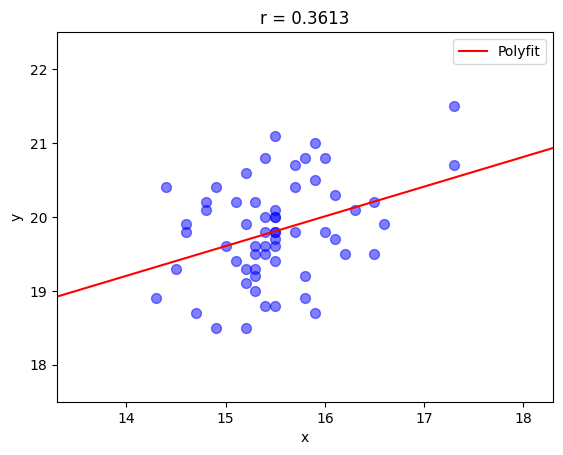

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from numpy.polynomial import polynomial

# 讀取數據
data_dir = r'C:\Users\SHI\OneDrive\PythonCodes\StatComp\demo_data\data1.txt'
D = np.loadtxt(data_dir, comments='%')
x, y = D[:, 0], D[:, 1]
r = pearsonr(x, y)[0]

# 計算最小平方法擬合的線性方程式的係數
coef = polynomial.polyfit(x, y, 1)

# 繪製散佈圖
plt.scatter(x, y, s=50, c='b', alpha=0.5)

# 繪製擬合直線
fitted_line = polynomial.Polynomial(coef)
x_values = np.linspace(0,20, 100)
y_values = fitted_line(x_values)
plt.plot(x_values, y_values, color='red', label='Polyfit')

plt.axis([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1])
plt.title(f'r = {r:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


<hr>

範例 4： 從 EXCEL 檔案讀取著名的 Iris data 並繪製散佈圖與長條圖。

**<font color=skyblue>注意事項與討論：</font>**
1. 下載 iris.xlsx

2. 學習使用 Pandas 套件處理 EXCEL 檔案，事半功倍。

3. Pandas 套件有許多內建的指令，能輕鬆的處理 EXCEL 工作表的資料，包括計算與繪圖。

4. 使用不熟悉的套件時，可以透過 print 指令，將取得的資料列出來看。下列程式碼列印了三個內容，讀者一定仔細看看，才進行後面的計算與繪圖。

5. 學習切割作圖區為矩陣式子圖 subplots，同時取得兩個子圖的座標區變數 ax1, ax2，以便能各別作圖。

6. 因為切割成 (1,2) 子圖的關係，採用 super title suptitle 作為共同的 title。

7. 練習將 iris.xlsx 工作表的第一與第二欄取出，並繪製散佈圖，且能利用欄位上的標題作為 X-Y 軸的標籤文字。

8. 長條圖則採用 pandas 的附帶功能。在此先進行各欄資料的平均，再畫出平均數的長條圖。

    Sepal Length  Sepal Width  Petal Length  Petal Width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
14           5.8          4.0           1.2          0.2
15           5.7          4.4           1.5          0.4
16           5.4          3.9  

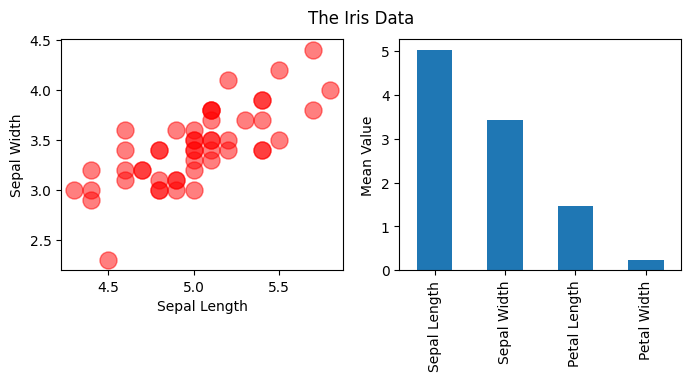

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
 
file_dir = 'C:\\Users\\SHI\\OneDrive\\PythonCodes\\StatComp\\iris.xlsx'

df = pd.read_excel(file_dir , index_col = None, header = 0)
 
print(df) # the contents
print(df.info()) # information for columns 
print(df.describe()) # descriptive stats
 
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 3))
ax1.scatter(df['Sepal Length'], df['Sepal Width'], \
     s = 150, c = 'r', alpha = 0.5)
ax1.set_xlabel(df.columns[0])   
ax1.set_ylabel(df.columns[1])  
fig.suptitle('The Iris Data') # the super title
df.mean().plot.bar(ax = ax2, ylabel = 'Mean Value')
plt.show()

<hr>
習題：
練習迴圈與矩陣的運算

練習散佈圖的繪製

練習以線性代數的矩陣運算處理重複性計算。

練習將矩陣儲存到 EXCEL 檔案（含列與欄標題）。


$$1. 繪製同心圓和標記$$

1.1 以迴圈方式繪製

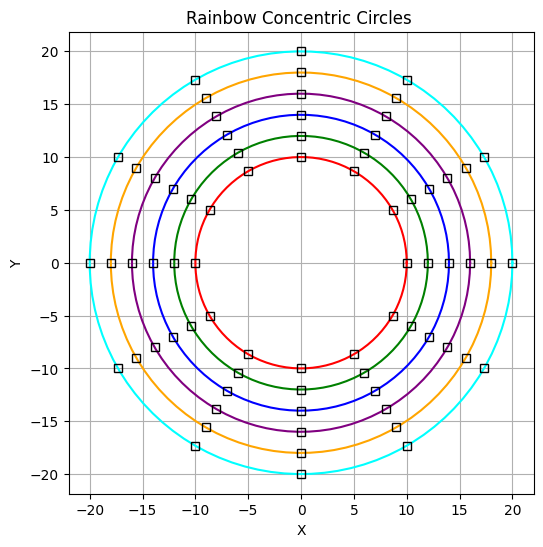

In [180]:
import numpy as np
import matplotlib.pyplot as plt

n = 6
marker = 's'  # Use square markers
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
# Create an array of radii from 10 to 20 with six values
radii = np.linspace(10, 20, n)

# Create an array of angles for drawing circles
theta = np.linspace(0, 2 * np.pi, 100)

# Initialize empty lists to store coordinates
x_list = []
y_list = []

# Generate coordinates using a loop
for i in range(n):
    x_i = radii[i] * np.cos(theta)
    y_i = radii[i] * np.sin(theta)
    x_list.append(x_i)
    y_list.append(y_i)

# Plot concentric circles
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.plot(x_list[i], y_list[i], color=colors[i])

# Loop to plot marker symbols at 30-degree intervals
for i in range(0, 360, 30):
    angle = np.radians(i)  # Convert angle to radians
    for j, radius in enumerate(radii):
        x_pos = radius * np.cos(angle)
        y_pos = radius * np.sin(angle)
        plt.plot(x_pos, y_pos, marker=marker, color='black', fillstyle='none')

plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.axis('equal')

plt.title('Rainbow Concentric Circles ')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


1.2 使用Broadcasting方式繪製

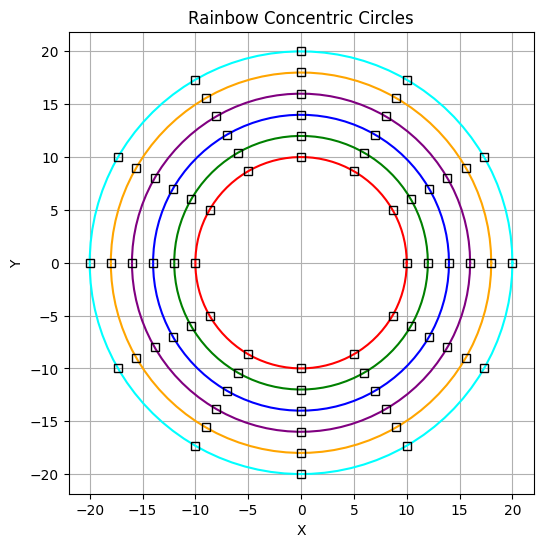

In [181]:
import numpy as np
import matplotlib.pyplot as plt

n = 6
marker = 's'  # Diamond marker
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']

# Create an array of radii from 10 to 20 with six values
radii = np.linspace(10, 20, n)

# Create an array of angles for drawing circles
theta = np.linspace(0, 2 * np.pi, 100)

# Use broadcasting to multiply the radii array by the angle array to generate coordinate arrays
x = radii[:, np.newaxis] * np.cos(theta)
y = radii[:, np.newaxis] * np.sin(theta)

# Plot concentric circles
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.plot(x[i], y[i], color=colors[i])

# Loop to plot marker symbols at 30-degree intervals
for i in range(0, 360, 30):
    angle = np.radians(i)  # Convert angle to radians
    for j, radius in enumerate(radii):
        x_pos = radius * np.cos(angle)
        y_pos = radius * np.sin(angle)
        plt.plot(x_pos, y_pos, marker=marker, color='black', fillstyle='none')

plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.axis('equal')

plt.title('Rainbow Concentric Circles')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


延伸作答\
1.2.1 將標記記號變更為星形

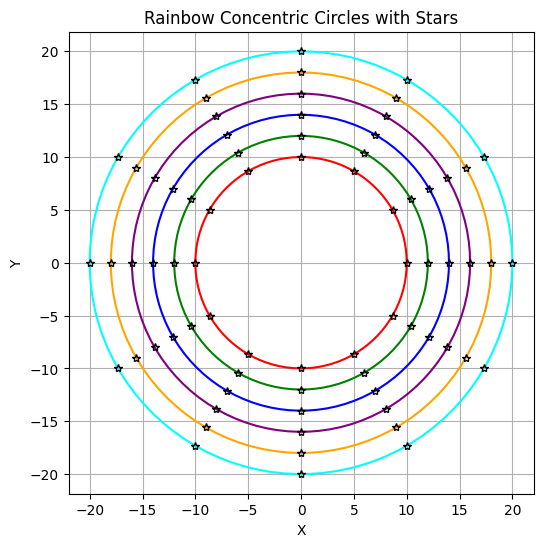

In [182]:
import numpy as np
import matplotlib.pyplot as plt

n = 6
marker = '*'  # Use asterisk markers
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']

# Create an array of radii from 10 to 20 with six values
radii = np.linspace(10, 20, n)

# Create an array of angles for drawing circles
theta = np.linspace(0, 2 * np.pi, 100)

# Use broadcasting to multiply the radii array by the angle array to generate coordinate arrays
x = radii[:, np.newaxis] * np.cos(theta)
y = radii[:, np.newaxis] * np.sin(theta)

# Plot concentric circles
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.plot(x[i], y[i], color=colors[i])

# Loop to plot marker symbols at 30-degree intervals
for i in range(0, 360, 30):
    angle = np.radians(i)  # Convert angle to radians
    for j, radius in enumerate(radii):
        x_pos = radius * np.cos(angle)
        y_pos = radius * np.sin(angle)
        plt.plot(x_pos, y_pos, marker=marker, color='black', fillstyle='none')

plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.axis('equal')

plt.title('Rainbow Concentric Circles with Stars')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()




延伸作答\
1.2.2 將圓圈數增加為10個

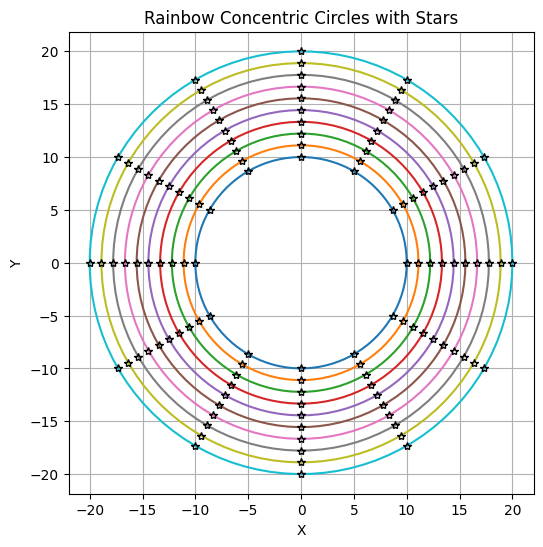

In [183]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
marker = '*'  # Use asterisk markers

# Create an array of radii from 10 to 20 with ten values
radii = np.linspace(10, 20, n)

# Create an array of angles for drawing circles
theta = np.linspace(0, 2 * np.pi, 100)

# Initialize empty lists to store coordinates
x_list = []
y_list = []

# Generate coordinates using a loop
for i in range(n):
    x_i = radii[i] * np.cos(theta)
    y_i = radii[i] * np.sin(theta)
    x_list.append(x_i)
    y_list.append(y_i)

# Plot concentric circles
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.plot(x_list[i], y_list[i])

# Loop to plot marker symbols at 30-degree intervals
for i in range(0, 360, 30):
    angle = np.radians(i)  # Convert angle to radians
    for j, radius in enumerate(radii):
        x_pos = radius * np.cos(angle)
        y_pos = radius * np.sin(angle)
        plt.plot(x_pos, y_pos, marker=marker, color='black', fillstyle='none')

plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.axis('equal')

plt.title('Rainbow Concentric Circles with Stars')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()



延伸作答\
1.2.3 將標記記號變更為實心黃色，且將圓形的顏色隨機生成。

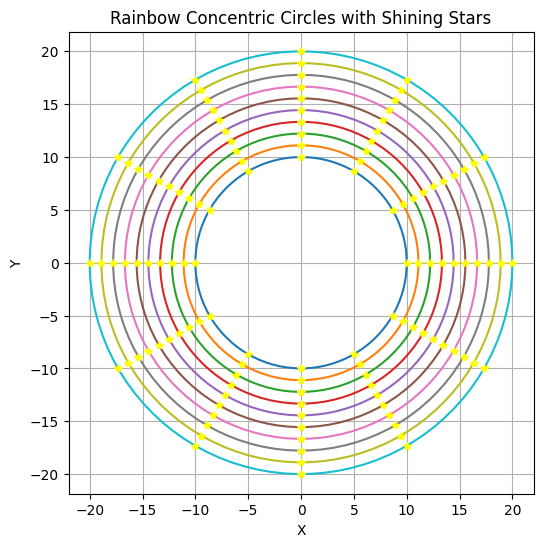

In [179]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
marker = '*'  # Use asterisk markers

# Create an array of radii from 10 to 20 with ten values
radii = np.linspace(10, 20, n)

# Create an array of angles for drawing circles
theta = np.linspace(0, 2 * np.pi, 100)

# Initialize empty lists to store coordinates
x_list = []
y_list = []

# Generate coordinates using a loop
for i in range(n):
    x_i = radii[i] * np.cos(theta)
    y_i = radii[i] * np.sin(theta)
    x_list.append(x_i)
    y_list.append(y_i)

# Plot concentric circles
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.plot(x_list[i], y_list[i])

# Loop to plot marker symbols at 30-degree intervals
for i in range(0, 360, 30):
    angle = np.radians(i)  # Convert angle to radians
    for j, radius in enumerate(radii):
        x_pos = radius * np.cos(angle)
        y_pos = radius * np.sin(angle)
        plt.plot(x_pos, y_pos, marker=marker, color='yellow')

plt.xticks(np.arange(-20, 21, 5))
plt.yticks(np.arange(-20, 21, 5))
plt.axis('equal')

plt.title('Rainbow Concentric Circles with Shining Stars')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


**<font color=skyblue>注意事項與討論：</font>**
這個程式碼是用Python和Matplotlib創建了一個簡單的圖形，其中包括不同顏色的同心圓和標記樣式。

- 導入NumPy和Matplotlib庫，這些庫用於處理數學運算和繪製圖形。
- 設置變數n為同心圓之個數。
- marker變數設置為標記圖案。
- 創建一個radii數組，該數組包含從10到20的十個值，這些值將作為同心圓的半徑。
- 創建一個theta數組，該數組包含了0到2π之間的100個角度值，用於繪製圓形。
- 初始化空的列表x_list和y_list，用於存儲同心圓的x和y坐標。
- 使用循環生成同心圓的坐標。對於每個半徑，我們使用np.cos和np.sin函數計算x和y坐標，然後將它們添加到x_list和y_list中。
- 使用兩個嵌套的循環在圖上繪製星號標記。外部循環每30度迭代一次，內部循環遍歷半徑，並使用np.cos和np.sin計算星號的坐標。

**<font color=skyblue>Marker補充資料：</font>**
| marker | description        |
|--------|--------------------|
| '.'    | point              |
| ','    | pixel              |
| 'o'    | circle             |
| 'v'    | triangle_down      |
| '^'    | triangle_up        |
| '<'    | triangle_left      |
| '>'    | triangle_right     |
| '1'    | tri_down           |
| '2'    | tri_up             |
| '3'    | tri_left           |
| '4'    | tri_right          |
| '8'    | octagon            |
| 's'    | square             |
| 'p'    | pentagon           |
| '*'    | plus (filled)      |
| 'h'    | star               |
| 'H'    | hexagon1           |
| '+'    | hexagon2           |
| 'x'    | plus               |
| 'X'    | x                  |
| 'D'    | x (filled)         |
| 'd'    | diamond            |
| '|'    | thin_diamond       |
| '_'    | vline              |
| '-'    | hline              |




<hr>
2. <br>

$$ 將方框數量的決定放在 code 第一條，譬如，n = 8，改變 n 值，便能看到結果的改變，譬如，n = 128。$$
$$ 接著將籃子的形狀稍作變更，使之更像真實的摩天輪。$$

2.1.1 繪製線與正方形

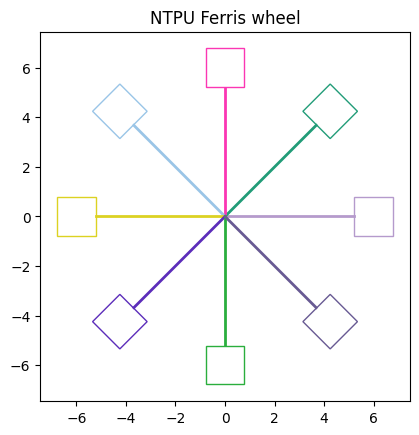

In [113]:
import matplotlib.pyplot as plt
import numpy as np

center = np.array([0, 0])  # Set the center point of the plot
invisible_line = 6  # Define the length of the invisible line
line = 5.2  # Define the length of line segment
square_side = 2.2  # Define the side length of the square
n = 8  # Number of segments to create a circle

angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)  # Convert angles to radians

fig, ax = plt.subplots()

for angle in angles:
    end_point = center + invisible_line * np.array([np.cos(angle), np.sin(angle)])
    line_color = np.random.rand(3,)  # Generate a random color for the line
    ax.plot([center[0], end_point[0]], [center[1], end_point[1]], color=line_color, alpha=0)

    square_points = [
        end_point + np.array([np.cos(angle + np.pi/4) * square_side/2, np.sin(angle + np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle + 3*np.pi/4) * square_side/2, np.sin(angle + 3*np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle - 3*np.pi/4) * square_side/2, np.sin(angle - 3*np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle - np.pi/4) * square_side/2, np.sin(angle - np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle + np.pi/4) * square_side/2, np.sin(angle + np.pi/4) * square_side/2])
    ]

    square_color = line_color
    square_x = [point[0] for point in square_points]
    square_y = [point[1] for point in square_points]
    square = plt.Polygon(list(zip(square_x, square_y)), edgecolor=square_color, fill=False)
    ax.add_patch(square)

    line_end_point = center + line * np.array([np.cos(angle), np.sin(angle)])
    ax.plot([center[0], line_end_point[0]], [center[1], line_end_point[1]], color=square_color, linestyle='-', linewidth=2)

ax.set_aspect('equal')  # Set equal aspect ratio for x and y axes
plt.title('NTPU Ferris wheel')  # Set the title for the plot
plt.show()



2.1.2 將n調整為16個，並將正方形與線段顏色由隨機生成。

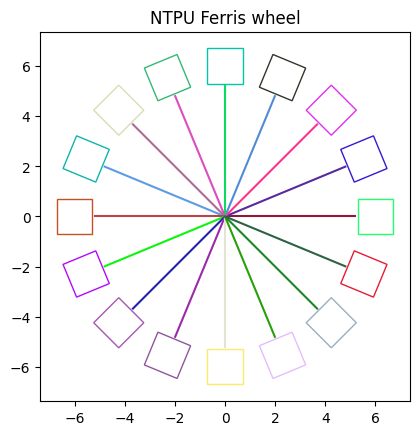

In [104]:
import matplotlib.pyplot as plt
import numpy as np

center = np.array([0, 0])
invisible_line = 6  
line = 5.2  
square_side = 2
n = 16
color = np.random.rand(3,)

angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)

fig, ax = plt.subplots()

for angle in angles:
    end_point = center + invisible_line * np.array([np.cos(angle), np.sin(angle)])  
    ax.plot([center[0], end_point[0]], [center[1], end_point[1],], alpha=0)

    square_points = [
        end_point + np.array([np.cos(angle + np.pi/4) * square_side/2, np.sin(angle + np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle + 3*np.pi/4) * square_side/2, np.sin(angle + 3*np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle - 3*np.pi/4) * square_side/2, np.sin(angle - 3*np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle - np.pi/4) * square_side/2, np.sin(angle - np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle + np.pi/4) * square_side/2, np.sin(angle + np.pi/4) * square_side/2])
    ]

    color = np.random.rand(3,)
    square_x = [point[0] for point in square_points]
    square_y = [point[1] for point in square_points]
    square = plt.Polygon(list(zip(square_x, square_y)), edgecolor=color, fill=False)
    ax.add_patch(square)

for angle in angles:
    end_point = center + line * np.array([np.cos(angle), np.sin(angle)])  # 更改變數名稱為 line
    color = np.random.rand(3,)
    ax.plot([center[0], end_point[0]], [center[1], end_point[1]], color=color, linestyle='-', linewidth=1.5)

ax.set_aspect('equal')
plt.title('NTPU Ferris wheel')
plt.show()


2.1.3 將n調整為256個，並將正方形與線段顏色由隨機生成。

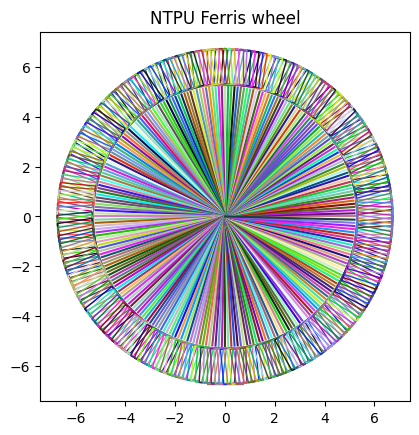

In [118]:
import matplotlib.pyplot as plt
import numpy as np

center = np.array([0, 0])
invisible_line = 6  
line = 5.2  
square_side = 2
n = 256
color = np.random.rand(3,)

angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)

fig, ax = plt.subplots()

for angle in angles:
    end_point = center + invisible_line * np.array([np.cos(angle), np.sin(angle)])  
    ax.plot([center[0], end_point[0]], [center[1], end_point[1],], alpha=0)

    square_points = [
        end_point + np.array([np.cos(angle + np.pi/4) * square_side/2, np.sin(angle + np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle + 3*np.pi/4) * square_side/2, np.sin(angle + 3*np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle - 3*np.pi/4) * square_side/2, np.sin(angle - 3*np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle - np.pi/4) * square_side/2, np.sin(angle - np.pi/4) * square_side/2]),
        end_point + np.array([np.cos(angle + np.pi/4) * square_side/2, np.sin(angle + np.pi/4) * square_side/2])
    ]

    color = np.random.rand(3,)
    square_x = [point[0] for point in square_points]
    square_y = [point[1] for point in square_points]
    square = plt.Polygon(list(zip(square_x, square_y)), edgecolor=color, fill=False)
    ax.add_patch(square)

for angle in angles:
    end_point = center + line * np.array([np.cos(angle), np.sin(angle)])  # 更改變數名稱為 line
    color = np.random.rand(3,)
    ax.plot([center[0], end_point[0]], [center[1], end_point[1]], color=color, linestyle='-', linewidth=1.5)

ax.set_aspect('equal')
plt.title('NTPU Ferris wheel')
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
這段程式碼是用來繪製一個圖形，稱為 "NTPU Ferris wheel"（臺北大學摩天輪）。\
以下是程式碼的主要步驟
- 首先匯入必要的繪圖庫和數學庫（Matplotlib 和 NumPy）。
- 定義圖形的中心點 center，以及幾個不同的長度變數，包括 invisible_line（不可見線的長度），line（從圓心發散線段的長度），以及 square_side（正方形的邊長）。這些變數將用於定義圖形的各個元素。
- 設定一個變數 n，表示總共有多少線段跟正方形。
- 計算每個圓弧的角度，從0度到360度，並將其轉換為弧度。
- 在迴圈中計算不可見線的終點，以繪製正方形，並計算正方形的四個頂點，並使用相同的線的顏色來繪製正方形邊框。。
- 最後，我們再次計算線段的終點，並使用相同的線的顏色來繪製具有一定寬度和線型的線段。
- 設定 x 和 y 軸的比例相同，並為圖形設定標題，然後顯示圖形。

**<font color=skyblue>程式碼詳細討論：</font>**
- end_point = center + invisible_line * np.array([np.cos(angle), np.sin(angle)]): 這一行程式碼計算了不可見線的終點座標 end_point。它根據圓心 (center) 和不可見線的長度 (invisible_line) 以及角度 (angle) 來計算終點的位置。這將確定不可見線的方向。
- ax.plot([center[0], end_point[0]], [center[1], end_point[1]] 用於在圓心和線段終點兩個點之間創建一個線段。
- alpha=0 表示設定線段完全透明，使其看起來像不可見的線。
- 正方形的每個頂點座標是根據 end_point計算的，並使用三角函數（np.cos 和 np.sin）來計算，它計算了正方形的每個頂點相對於 end_point 的偏移，並將其放在 square_points 列表中。
- square = plt.Polygon(list(zip(square_x, square_y)), edgecolor=square_color, fill=False): 這一行程式碼使用 plt.Polygon 函數創建一個正方形的多邊形對象 square。它通過結合 square_x 和 square_y 中的座標來定義正方形的邊框形狀。edgecolor 被設定為 square_color，這意味著正方形的邊框將以與不可見線相同的顏色繪製。
- fill=False 表示不填充正方形的內部，只繪製邊框。

2.2.1 繪製北大摩天輪

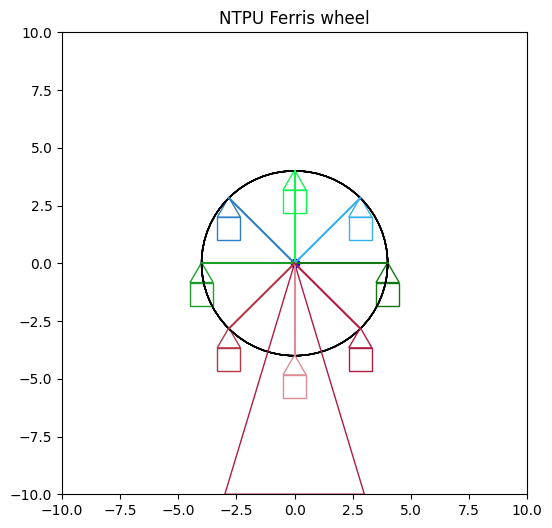

In [193]:
import matplotlib.pyplot as plt
import numpy as np

center = np.array([0, 0])
line2_length = 4  
n = 8
box_size = 1.0  
foundation = np.array([[-3.0, -10], [3.0, -10], [0, 0]])  
angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)

def draw_bell(ax, center, size, color):
    square_vertices = np.array([[center[0]-size/2, center[1]], 
                               [center[0]+size/2, center[1]], 
                               [center[0]+size/2, center[1]-size], 
                               [center[0]-size/2, center[1]-size]])
    triangle_vertices = np.array([[center[0]-size/2, center[1]], 
                                [center[0], center[1]+np.sqrt(3)*size/2], 
                                [center[0]+size/2, center[1]]])
    
    ax.add_patch(plt.Polygon(square_vertices, closed=True, edgecolor=color, facecolor='none'))
    ax.add_patch(plt.Polygon(triangle_vertices, closed=True, edgecolor=color, facecolor='none'))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(center[0], center[1], 'bo')

for i in range(n):
    color = np.random.rand(3,)
    angle_rad = np.radians(i * 360/n)
    end_point = center + line2_length * np.array([np.cos(angle_rad), np.sin(angle_rad)])
    ax.plot([center[0], end_point[0]], [center[1], end_point[1]], color=color, linewidth=1.5)

    circle = plt.Circle(center, line2_length, edgecolor="black", facecolor='none')
    ax.add_patch(circle)

    triangle_center = end_point
    triangle_vertex = triangle_center + box_size * np.array([0, np.sqrt(3)/2])
    triangle_vertex[1] -= 1.7
    draw_bell(ax, triangle_vertex, box_size, color)

ax.add_patch(plt.Polygon(foundation, closed=True, edgecolor=color, facecolor='none'))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plt.title('NTPU Ferris wheel')
plt.show()



**<font color=skyblue>注意事項與討論：</font>**
這段程式碼是用來繪製一個圖形，稱為 "NTPU Ferris wheel"（臺北大學摩天輪）。\
以下是程式碼的主要步驟
- 首先匯入必要的繪圖庫和數學庫（Matplotlib 和 NumPy）。
- 定義圖形的中心點 center，以及幾個不同的長度變數，包括 invisible_line（不可見線的長度），line（從圓心發散線段的長度），以及 square_side（正方形的邊長）。這些變數將用於定義圖形的各個元素。
- 設定一個變數 n，表示總共有多少線段跟正方形。
- 計算每個圓弧的角度，從0度到360度，並將其轉換為弧度。
- 在迴圈中計算不可見線的終點，以繪製正方形，並計算正方形的四個頂點，並使用相同的線的顏色來繪製正方形邊框。。
- 最後，我們再次計算線段的終點，並使用相同的線的顏色來繪製具有一定寬度和線型的線段。
- 設定 x 和 y 軸的比例相同，並為圖形設定標題，然後顯示圖形。

**<font color=skyblue>程式碼詳細討論：</font>**
- end_point = center + invisible_line * np.array([np.cos(angle), np.sin(angle)]): 這一行程式碼計算了不可見線的終點座標 end_point。它根據圓心 (center) 和不可見線的長度 (invisible_line) 以及角度 (angle) 來計算終點的位置。這將確定不可見線的方向。
- ax.plot([center[0], end_point[0]], [center[1], end_point[1]] 用於在圓心和線段終點兩個點之間創建一個線段。
- alpha=0 表示設定線段完全透明，使其看起來像不可見的線。
- 正方形的每個頂點座標是根據 end_point計算的，並使用三角函數（np.cos 和 np.sin）來計算，它計算了正方形的每個頂點相對於 end_point 的偏移，並將其放在 square_points 列表中。
- square = plt.Polygon(list(zip(square_x, square_y)), edgecolor=square_color, fill=False): 這一行程式碼使用 plt.Polygon 函數創建一個正方形的多邊形對象 square。它通過結合 square_x 和 square_y 中的座標來定義正方形的邊框形狀。edgecolor 被設定為 square_color，這意味著正方形的邊框將以與不可見線相同的顏色繪製。
- fill=False 表示不填充正方形的內部，只繪製邊框。

延伸作答
 
2.2.2加入閃亮的太陽

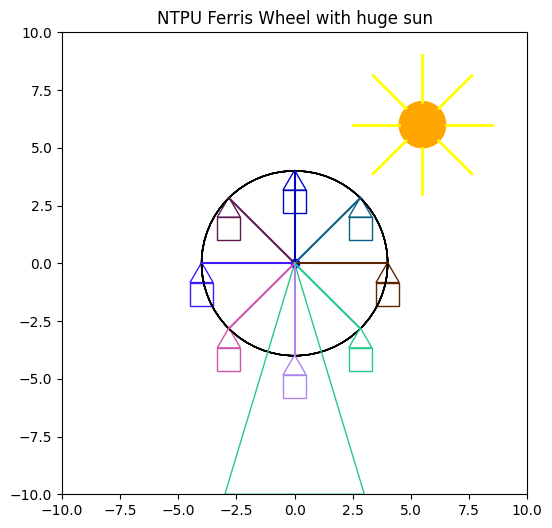

In [197]:
import matplotlib.pyplot as plt
import numpy as np

center = np.array([0, 0])
line2_length = 4  
n = 8
box_size = 1.0  
foundation = np.array([[-3.0, -10], [3.0, -10], [0, 0]])  
angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)

def draw_bell(ax, center, size, color):
    square_vertices = np.array([[center[0]-size/2, center[1]], 
                               [center[0]+size/2, center[1]], 
                               [center[0]+size/2, center[1]-size], 
                               [center[0]-size/2, center[1]-size]])
    triangle_vertices = np.array([[center[0]-size/2, center[1]], 
                                [center[0], center[1]+np.sqrt(3)*size/2], 
                                [center[0]+size/2, center[1]]])
    
    ax.add_patch(plt.Polygon(square_vertices, closed=True, edgecolor=color, facecolor='none'))
    ax.add_patch(plt.Polygon(triangle_vertices, closed=True, edgecolor=color, facecolor='none'))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(center[0], center[1], 'bo')

for i in range(n):
    color = np.random.rand(3,)
    angle_rad = np.radians(i * 360/n)
    end_point = center + line2_length * np.array([np.cos(angle_rad), np.sin(angle_rad)])
    ax.plot([center[0], end_point[0]], [center[1], end_point[1]], color=color, linewidth=1.5)

    circle = plt.Circle(center, line2_length, edgecolor="black", facecolor='none')
    ax.add_patch(circle)

    triangle_center = end_point
    triangle_vertex = triangle_center + box_size * np.array([0, np.sqrt(3)/2])
    triangle_vertex[1] -= 1.7
    draw_bell(ax, triangle_vertex, box_size, color)

ax.add_patch(plt.Polygon(foundation, closed=True, edgecolor=color, facecolor='none'))

sun_radius = 1.0
sun_x = 5.5
sun_y = 6.0
ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, color='orange'))


for angle_deg in range(0, 360, 45):
    angle_rad = np.radians(angle_deg)
    ray_length = 2.0
    ray_x = sun_x + sun_radius * np.cos(angle_rad)
    ray_y = sun_y + sun_radius * np.sin(angle_rad)
    ray_end_x = ray_x + ray_length * np.cos(angle_rad)
    ray_end_y = ray_y + ray_length * np.sin(angle_rad)
    ax.plot([ray_x, ray_end_x], [ray_y, ray_end_y], color='yellow', linewidth=2)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plt.title('NTPU Ferris Wheel with huge sun')
plt.show()

<hr>
3.

$$  繪製卡方右尾面積與自由度對照表，並匯出至Excel$$

In [203]:
import pandas as pd
import scipy.stats as stats

# Different significance levels
alpha_values = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.5, 0.025, 0.01, 0.005]

data = []

# Iterate over degrees of freedom from 1 to 30
for degrees_of_freedom in range(1, 31):
    # Calculate the critical chi-squared values for each alpha level
    chi2_critical_values = [stats.chi2.ppf(1 - alpha, degrees_of_freedom) for alpha in alpha_values]
    data.append([degrees_of_freedom] + chi2_critical_values)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Degrees of Freedom'] + [f'α={alpha}' for alpha in alpha_values])

# Output to an Excel file
df.to_excel('chi2Table.xlsx', index=False)




這段代碼首先創建了一個空的列表data，然後使用兩個嵌套的循環，對不同自由度和顯著性水平計算卡方值，並將這些值添加到data中。接下來，它創建一個包含這些數據的DataFrame，並將DataFrame保存為Excel文件。